## J-boi Tweets Exploration
By Nick Brooks

In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import nltk
import random

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *

In [2]:
import sys
sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

In [18]:
# Read Data
os.chdir(r"C:\Users\Nicol\Google Drive\Learning\Jupyter\Data")
df = pd.read_csv("jaden_smith_tweets.csv", index_col="id")
df = df.drop(["Unnamed: 0", "fullname","user"], axis=1)

In [19]:
pd.set_option('max_colwidth', 500)
df.text= df.text.astype(str)
df.iloc[:20,:]

,likes,replies,retweets,text,timestamp
id,,,,,
45295377817141248,0,0,0,Chillin with my bro @justinbieber,2011-03-09 01:30:34
45298120585777152,0,0,0,Learning about twitter from @AlfredoFlores,2011-03-09 01:41:28
45304012379131904,0,0,0,bout to eat some really thin pancakes. haha,2011-03-09 02:04:52
45305188935933952,80,2,360,@jordynwoods Sup bestie,2011-03-09 02:09:33
45308006342213632,0,0,0,wow thanks for all of the followers you fans are awesome!,2011-03-09 02:20:45
45320196063375360,0,0,0,Real... @Alfredoflores is the best ripper swagggg RT @JustinBieber: http://twitvid.com/BV9OK - im more aerodynamic when i #ripmysleeves,2011-03-09 03:09:11
45322091200913408,61,5,237,@Olivia_Holt Wassup follow me..,2011-03-09 03:16:43
45330665486548992,72,0,259,@AriasBros Yo guys follow me,2011-03-09 03:50:47
45560283980251136,101,0,809,Let's get #East trending,2011-03-09 19:03:12


In [44]:
df.sort_values(by=["likes"], ascending=False)[:5]

,likes,replies,retweets,text,timestamp
id,,,,,
801846069311066112,999,35,236,http://msftsrepublic.tumblr.com,2016-11-24 17:52:55
540668049989566464,989,89,432,Yeah Anyway Incase You Guys Forgot Here's My Albumhttps://appsto.re/us/gDaO2.i,2014-12-05 00:44:42
551497252305240064,986,97,439,http://rt.com/usa/219299-cia-ufo-spy-russia/ …,2015-01-03 21:56:05
526531222013345792,983,76,514,AZZI Whats Goodhttps://soundcloud.com/azzi/jaden-jetskis-prod-by-azzi …,2014-10-27 00:30:00
631685196736274432,979,42,260,"#MyDSS Dubai Mall 4:30 Be There Or Be Square, We Bout To Turn Up. ||| #MSFTSreppic.twitter.com/2h9TtkXVro",2015-08-13 04:34:21


In [45]:
df.sort_values(by=["replies"], ascending=False)[:5]

,likes,replies,retweets,text,timestamp
id,,,,,
87460984083591168,128,953,421,Online #IThink,2011-07-03 10:01:38
100194728955482112,223,899,677,Dear EveryBody Who's Crazy Enough To Be On Twitter This Early I Cant Sleep And I haven't Been To Sleep All Night ..........#SooUhhhYeah,2011-08-07 13:20:59
151718164768628736,153,899,447,4 Days Left In 2011. What Was Your Favorite Song Of The Year? #soundoff,2011-12-27 17:36:43
157886903167885312,190,888,568,#FollowSwagFridays Where all the #Jadenators @?,2012-01-13 18:09:05
95660704148897792,152,842,481,Im Sick But Getting Better.......#RealRaw,2011-07-26 01:04:23
173130440616591360,220,801,577,#FollowSwagFridays What Up,2012-02-24 19:41:28
85448689300152320,286,800,878,Just Watched Up And Cried Haha No I'm Just Kidding....... #NoImNot,2011-06-27 20:45:29
115339673492135936,153,799,534,I Just Cried,2011-09-18 08:21:35
93831962715881472,281,717,995,I Wana Thank All My Fans For Getting Me To #1Million Followers #StayRaw,2011-07-20 23:57:37


In [46]:
df.sort_values(by=["retweets"], ascending=False)[:5]

,likes,replies,retweets,text,timestamp
id,,,,,
132877854089293824,402,423,997,Dear All My Fans Your The Greatest Fans In World I Love You All And Never Forget It #RealGs,2011-11-05 17:52:03
159170646012723200,222,20,995,3,2012-01-17 07:10:13
93831962715881472,281,717,995,I Wana Thank All My Fans For Getting Me To #1Million Followers #StayRaw,2011-07-20 23:57:37
232561337908228096,736,230,993,#PumpedUpKicksLikeMe http://youtu.be/_6cbCGzocAU Let's Get It,2012-08-06 19:38:38
159170616019259392,224,47,990,5,2012-01-17 07:10:06


In [ ]:
## Retweets, Replies, or Likes?

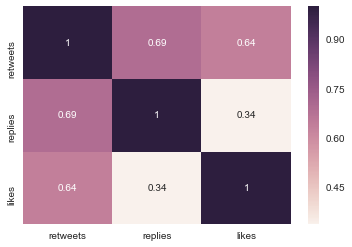

In [54]:
sns.heatmap(df[["retweets","replies","likes"]].corr(), annot=True)

In [ ]:
## Time Frame, plot all three metrics

## Pre-Processing

This processing is not adapted to tweets. Seperate 
- \# hashtags and
- @ into seperate columns

to analyze topics

In [20]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #ords = [ps.stem(w) for w in words] #4
    return words

def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

# Sources
# https://www.kaggle.com/longdoan/word-cloud-with-python
# https://github.com/amueller/word_cloud/issues/134
# https://amueller.github.io/word_cloud/auto_examples/masked.html

def cloud(text, title):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    print(wordcloud);
    
    # Output Visualization
    fig = plt.figure(figsize=(20,10), facecolor='k')
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.show();
    #fig.savefig("wordcloud.png", dpi=900)

## Sentiment Analysis

Could study the word mood excuded by the various authors.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

# Pre-Processing
SIA = SentimentIntensityAnalyzer()

D:\WindowsApps\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## WordCloud

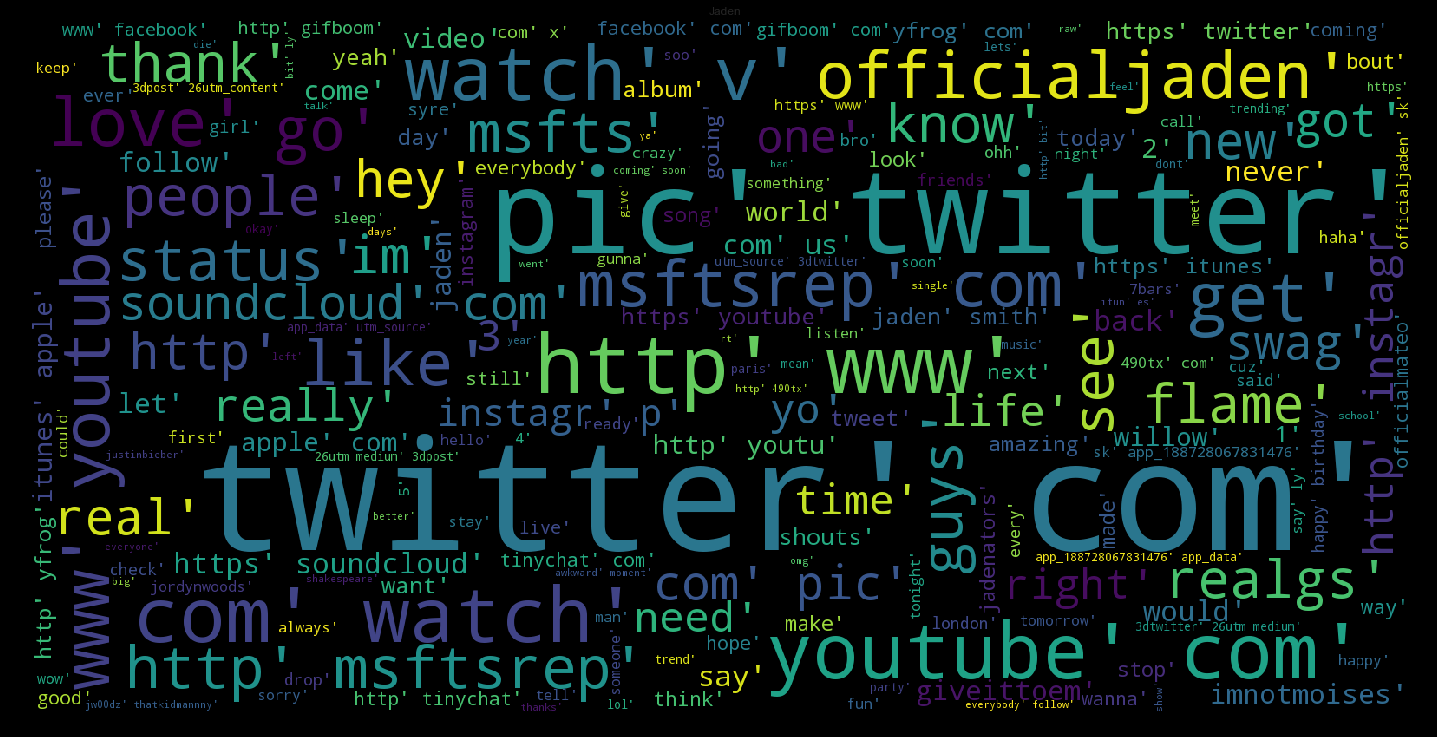

None


In [24]:
print(cloud(preprocessing(df['text']), 'Jaden'))

Would be interesting to extract the various types of Parts of Speech, in order to hone in on the different choie in vocabulary

## N Grams

In [25]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    #----output----
    print(df.sort_values(["frequency"],ascending=[0])[:num])

In [26]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    
    return df.sort_values(["frequency"],ascending=[0])[:num]

In [30]:
def gram_table(gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(df['text']),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [31]:
# try to use pd.crosstab
# https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [34]:
gram_table(gram=[1,2,3,4], length=20)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,com,1023,twitter com,579,pic twitter com,310,youtube com watch v,95
1,twitter,600,pic twitter,310,youtube com watch,98,www youtube com watch,67
2,http,414,http www,114,com watch v,95,http www youtube com,57
3,pic,312,youtube com,105,www youtube com,74,com pic twitter com,46
4,https,159,com watch,102,http msftsrep com,60,http msftsrep com pic,41
5,www,143,watch v,95,http www youtube,57,msftsrep com pic twitter,41
6,msftsrep,130,www youtube,74,com pic twitter,46,itunes apple com us,29
7,watch,129,msftsrep com,69,msftsrep com pic,41,https youtube com watch,25
8,youtube,108,http msftsrep,60,https soundcloud com,36,https itunes apple com,24
9,v,101,com pic,46,http instagr p,36,http gifboom com x,19


Probably don't actually need this.

## Naive Bayes

Generative Models based off Bayes' Rule and Conditional Probabilities

In [15]:
print("Train Vocabulary Size: {}".format(len(nltk.FreqDist(preprocessing(df['text'])))))
print("Train Size: {}".format(len(df)))
print("Test Vocabulary Size: {}".format(len(nltk.FreqDist(preprocessing(test['text'])))))
print("Test Size: {}".format(len(test)))

Train Vocabulary Size: 24944
Train Size: 19579
Test Vocabulary Size: 17421
Test Size: 8392


In [16]:
# Number of features
all_words = nltk.FreqDist(preprocessing(df['text'])) # Calculate word occurence from whole block of text
word_features = list(all_words.keys())[:20000] 
# Number of columns (can't exceed vocab, only shrink it) from largest to smallest

In [17]:
# Helper Functions
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

# Function to create model features
def model_prep(state, df_in):
    df_in['tokenized'] = df_in.text.astype(str).str.lower() # turn into lower case text
    df_in['tokenized'] = df_in.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # apply tokenize to each row
    df_in['tokenized'] = df_in['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # remove stopwords from each row
    df_in['tokenized'] = df_in['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # apply stemming to each row
    if state == "Train":
        print("{} Word Features: {}".format(state, len(word_features)))
        print("All Possible words in {} set: {}".format(state, len(all_words)))
        # Bag of Words with Label
        featuresets = [(find_features(text), LABEL) for (text, LABEL) in list(zip(df_in.tokenized, (df_in.author)))]
        print("Train Set Size: {}".format(len(featuresets)))
        print("Train Set Ready")
        return featuresets, word_features
    else:
        # Bag of Words without Labels
        featuresets = [(find_features(text)) for (text) in list(df_in.tokenized)]
        print("Submission Set Size: {}".format(len(featuresets)))
        print("Submission Set Ready")
        return featuresets

In [18]:
trainset, word_features= model_prep("Train", df_in=df)

Train Word Features: 20000
All Possible words in Train set: 24944
Train Set Size: 19579
Train Set Ready


In [19]:
submissionset = model_prep("Test", df_in=test)

Submission Set Size: 8392
Submission Set Ready


In [20]:
training_set = trainset[:15000]
testing_set = trainset[15000:]
del trainset

## Execute Model

In [21]:
import datetime
start = time.time()
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Posterior = prior_occurence * likelihood / evidence
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Model took 372.47 seconds to train


In [22]:
# Edgar Allan Poe [EAP], Mary Shelley[MWS], and HP Lovecraft[HPL]

In [23]:
print("Classifier Test Accuracy:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier Test Accuracy: 78.33588119676786
Most Informative Features
                 raymond = True              MWS : HPL    =     72.8 : 1.0
                 passion = True              MWS : HPL    =     52.7 : 1.0
                   beard = True              HPL : EAP    =     41.5 : 1.0
                    folk = True              HPL : MWS    =     38.1 : 1.0
                    grey = True              HPL : EAP    =     33.1 : 1.0
                  legend = True              HPL : EAP    =     32.2 : 1.0
                       l = True              EAP : MWS    =     31.3 : 1.0
                  jermyn = True              HPL : EAP    =     31.2 : 1.0
                  though = True              HPL : EAP    =     30.2 : 1.0
                    dear = True              MWS : HPL    =     29.8 : 1.0
                 balloon = True              EAP : HPL    =     26.5 : 1.0
                    girl = True              MWS : HPL    =     25.9 : 1.0
               endeavour = Tru

In [24]:
classifier.labels()

['EAP', 'HPL', 'MWS']

In [25]:
labels = classifier.labels()
submission = pd.DataFrame(columns=labels)
for x in submissionset:
    dist = classifier.prob_classify(x)
    submission= submission.append({labels[0]:dist.prob(labels[0]),
                                   labels[1]:dist.prob(labels[1]),
                                   labels[2]:dist.prob(labels[2])},ignore_index=True)
submission.index = test.index

In [26]:
submission.head()

,EAP,HPL,MWS
id,,,
id02310,0.003620,0.002385,0.993994
id24541,0.745305,0.253139,0.001557
id00134,0.070576,0.929397,0.000027
id27757,0.098863,0.901106,0.000031
id04081,0.987642,0.008824,0.003534


In [27]:
submission.to_csv("naive_spooky.csv")